## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

Sun Nov 22 16:45:24 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 442.23       Driver Version: 442.23       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 166... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   46C    P8     7W /  N/A |    514MiB /  6144MiB |      3%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
import os
import keras
#https://blog.gtwang.org/programming/tensorflow-keras-specify-gpu-and-memory-tutorial/
# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] ="0"

In [4]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
"""Code Here
建立你的神經網路
"""
#def build_mlp():
input_layer = keras.layers.Input([x_train.shape[-1]])
x = keras.layers.Dense(units=1024, activation="relu")(input_layer)
x = keras.layers.Dense(units=512, activation="relu")(x)
x = keras.layers.Dense(units=256, activation="relu")(x)
x = keras.layers.Dense(units=256, activation="relu")(x)
x = keras.layers.Dense(units=128, activation="relu")(x)
x = keras.layers.Dense(units=64, activation="relu")(x)
out = keras.layers.Dense(units=10, activation="softmax")(x)
    
model = keras.models.Model(inputs=[input_layer], outputs=[out])
#    return model

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
__________

In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [9]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [10]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 92us/step - loss: 1.9616 - acc: 0.2801 - val_loss: 1.7713 - val_acc: 0.3633
Epoch 2/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.7313 - acc: 0.3755 - val_loss: 1.6819 - val_acc: 0.3862
Epoch 3/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.6456 - acc: 0.4090 - val_loss: 1.5866 - val_acc: 0.4348
Epoch 4/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.5849 - acc: 0.4303 - val_loss: 1.5889 - val_acc: 0.4243
Epoch 5/100
50000/50000 [==============================] - 3s 56us/step - loss: 1.5280 - acc: 0.4537 - val_loss: 1.5071 - val_acc: 0.4654
Epoch 6/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.4857 - acc: 0.4691 - val_loss: 1.4857 - val_acc: 0.4724
Epoch 7/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.4544 - acc: 0.4765 - val_loss: 1.4615 - 

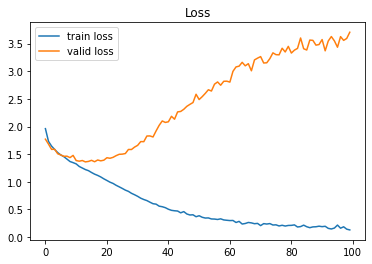

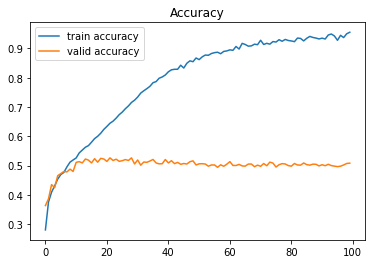

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()